In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/infilatration.csv')

In [3]:
# Data preprocessing
# Drop any rows with missing values
data.dropna(inplace=True)

In [4]:
# Replace infinite or very large values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
# Drop rows containing NaN values
data.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])


In [7]:
# Split features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# SelectKBest with ANOVA F-value
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [11]:
selected_features_indices = selector.get_support(indices=True)

In [12]:
selected_feature_names = X.columns[selected_features_indices]


In [13]:
# Print the selected feature names
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Flow IAT Max', 'Fwd IAT Max',
       'Bwd IAT Total', 'Bwd IAT Max', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Header Length.1', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'act_data_pkt_fwd',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std',
       'Idle Max'],
      dtype='object')


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train_selected, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test_selected)

In [18]:
# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57673
           1       1.00      0.17      0.29         6

    accuracy                           1.00     57679
   macro avg       1.00      0.58      0.64     57679
weighted avg       1.00      1.00      1.00     57679

Confusion Matrix:
[[57673     0]
 [    5     1]]


In [19]:
# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test_selected)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

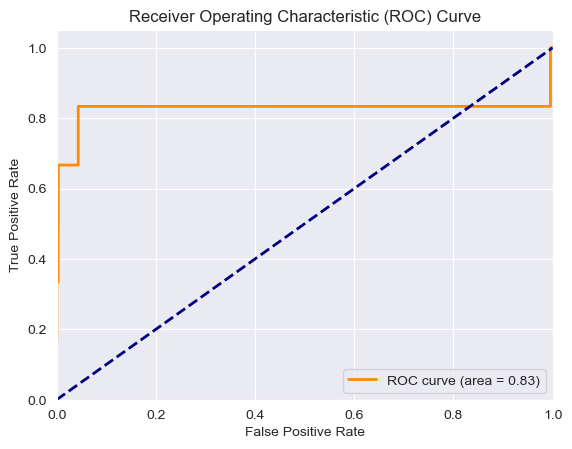

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Compute accuracy, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy: 0.9999133133376099
precision: 1.0
f1score: 0.2857142857142857


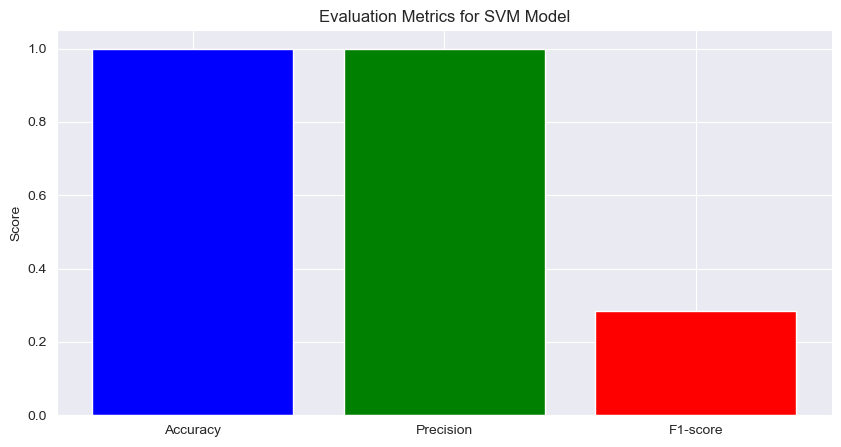

In [22]:
# Plotting
metrics = ['Accuracy', 'Precision', 'F1-score']
values = [accuracy, precision, f1]


print('accuracy: ' + str(accuracy))
print('precision: ' + str(precision))
print('f1score: ' + str(f1))
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Evaluation Metrics for SVM Model')
plt.show()

Confusion Matrix:
[[57673     0]
 [    5     1]]


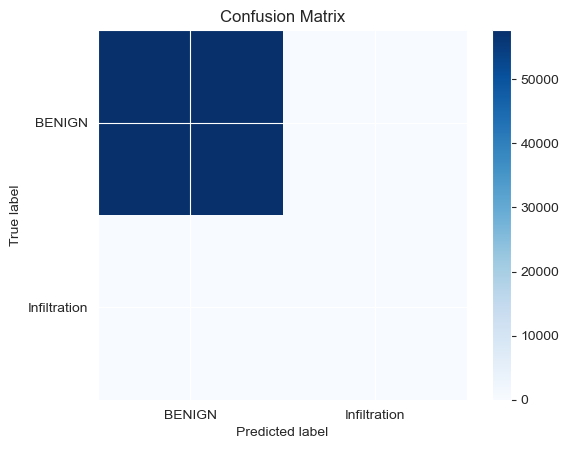

In [23]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['BENIGN', 'Infiltration'])
plt.yticks([0, 1], ['BENIGN', 'Infiltration'])
plt.show()


In [24]:
# Extracting false positives and false negatives from confusion matrix
FP = conf_matrix[0, 1]  # False positives: predicted DDoS, actual BENIGN
FN = conf_matrix[1, 0]  # False negatives: predicted BENIGN, actual DDoS

print("False Positives:", FP)
print("False Negatives:", FN)


False Positives: 0
False Negatives: 5


In [25]:
# Number of test values
num_test_values = len(y_test)
print("Number of test values:", num_test_values)


Number of test values: 57679


In [26]:

# Calculate percentage of false positives and false negatives
percentage = ((FP + FN) / num_test_values) * 100

print("Percentage of False Positives and False Negatives: {:.2f}%".format(percentage))


Percentage of False Positives and False Negatives: 0.01%


In [27]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'infiltration_logistic_model.pkl')

# Load the model from file
# loaded_model = joblib.load('svm_model.pkl')


['infiltration_logistic_model.pkl']